In [1]:
%matplotlib widget

In [2]:
import sys
shared_dir = '/nsls2/data/lix/shared/software'
sys.path = ['.', f'{shared_dir}/py4xs', f'{shared_dir}/lixtools']+sys.path

In [3]:
from py4xs.hdf import h5exp,h5xs
import numpy as np
import pylab as plt
from py4xs.utils import get_grid_from_bin_ranges

In [4]:
q_bin_ranges = [[[0.0045, 0.0995], 95], [[0.0975, 0.6025], 101], [[0.605, 2.905], 230]]
qgrid = get_grid_from_bin_ranges(q_bin_ranges)

In [5]:
de = h5exp("exp.h5")

In [6]:
dt = h5xs("2017_Hippo_B_s2_0_0.h5", [de.detectors, qgrid])

In [7]:
dt.samples

['2017_Hippo_B_s2_0_0']

In [8]:
dt.load_data(N=8)

/nsls2/data/lix/shared/software/py4xs/py4xs/hdf.py:304: RuntimeWarning: invalid value encountered in divide
  s0.data = d_tot/w_tot
/nsls2/data/lix/shared/software/py4xs/py4xs/hdf.py:305: RuntimeWarning: invalid value encountered in divide
  s0.err = np.sqrt(e_tot)/w_tot
/nsls2/data/lix/shared/software/py4xs/py4xs/hdf.py:304: RuntimeWarning: invalid value encountered in divide
  s0.data = d_tot/w_tot
/nsls2/data/lix/shared/software/py4xs/py4xs/hdf.py:305: RuntimeWarning: invalid value encountered in divide
  s0.err = np.sqrt(e_tot)/w_tot
/nsls2/data/lix/shared/software/py4xs/py4xs/hdf.py:304: RuntimeWarning: invalid value encountered in divide
  s0.data = d_tot/w_tot
/nsls2/data/lix/shared/software/py4xs/py4xs/hdf.py:305: RuntimeWarning: invalid value encountered in divide
  s0.err = np.sqrt(e_tot)/w_tot
/nsls2/data/lix/shared/software/py4xs/py4xs/hdf.py:304: RuntimeWarning: invalid value encountered in divide
  s0.data = d_tot/w_tot
/nsls2/data/lix/shared/software/py4xs/py4xs/hdf.py:3

data received: sn=2017_Hippo_B_s2_0_0, fr1=0
data received: sn=2017_Hippo_B_s2_0_0, fr1=820
data received: sn=2017_Hippo_B_s2_0_0, fr1=1640
data received: sn=2017_Hippo_B_s2_0_0, fr1=2460
data received: sn=2017_Hippo_B_s2_0_0, fr1=3280
data received: sn=2017_Hippo_B_s2_0_0, fr1=4100


/nsls2/data/lix/shared/software/py4xs/py4xs/hdf.py:284: RuntimeWarning: divide by zero encountered in divide
  wt = 1/d1.err[idx]**2
/nsls2/data/lix/shared/software/py4xs/py4xs/hdf.py:286: RuntimeWarning: invalid value encountered in multiply
  e_tot[idx] += d1.err[idx]**2*wt**2


data received: sn=2017_Hippo_B_s2_0_0, fr1=4920
data received: sn=2017_Hippo_B_s2_0_0, fr1=5740


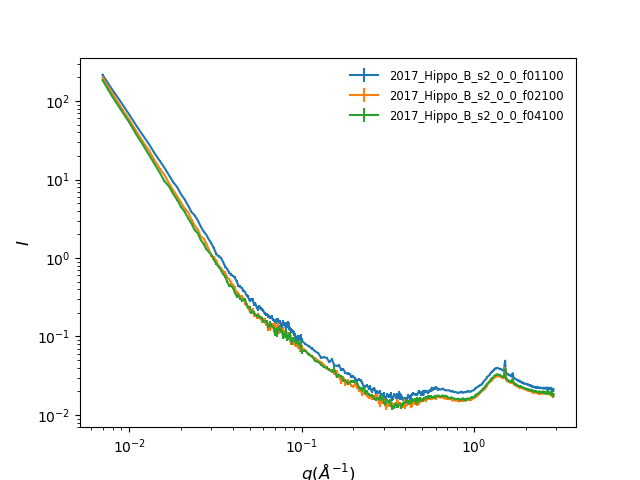

In [9]:
plt.figure()
dt.d1s[dt.samples[0]]['merged'][1100].plot(ax=plt.gca())
dt.d1s[dt.samples[0]]['merged'][2100].plot(ax=plt.gca())
dt.d1s[dt.samples[0]]['merged'][4100].plot(ax=plt.gca())

{'_SAXS': <py4xs.data2d.Data2d at 0x7f1cffd77bb0>,
 '_WAXS2': <py4xs.data2d.Data2d at 0x7f1c72c50910>}

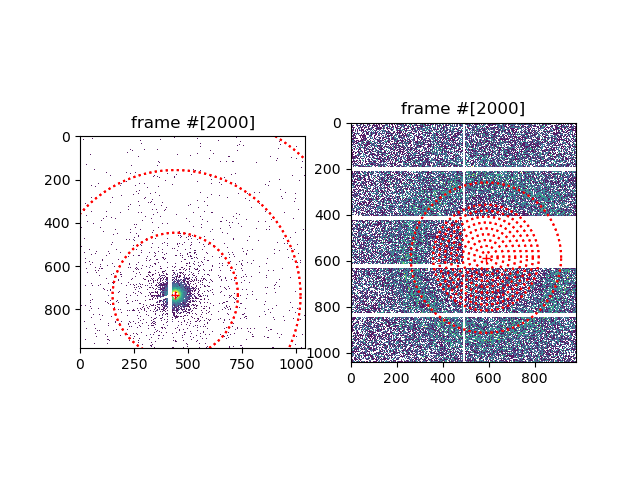

In [8]:
dt.show_data(frn=2000)

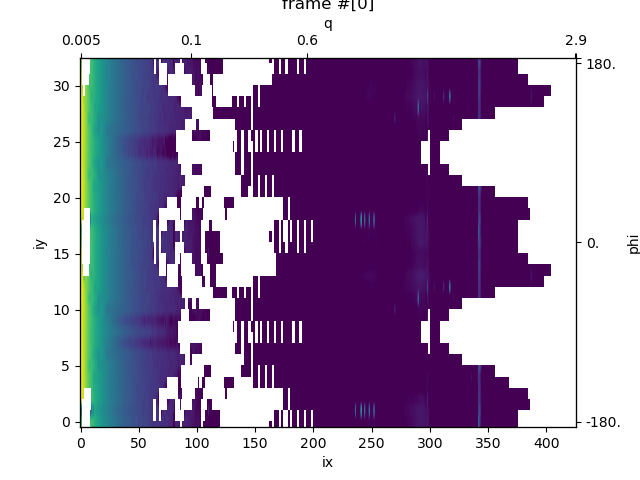

In [15]:
dt.show_data_qphi(sn="paper-2023Oct12", Nq=qgrid, Nphi=32, apply_symmetry=True)

In [12]:
dt.show_data_qphi?

Signature:
dt.show_data_qphi(
    sn=None,
    frn=None,
    ax=None,
    Nq=200,
    Nphi=60,
    apply_symmetry=False,
    fill_gap=False,
    sc_factor=None,
    logScale=True,
    useMask=True,
    clim=(0.1, 14000),
    showRef=True,
    bkg=None,
    aspect='auto',
    cmap=None,
    detectors=None,
    dtype=None,
    colorbar=False,
    **kwargs,
)
Docstring:
display frame #frn of the data under det for sample sn
Nq can be given as a integer, for the number of data points, or as an array
File:      /nsls2/data/lix/shared/software/py4xs/py4xs/hdf.py
Type:      method


In [18]:
!pwd

/nsls2/data3/lix/legacy/2023-3/pass-313027/312022


In [22]:
!ls -l --block-size=G

total 56G
-rw-rw-r--+ 1 xf16id xf16id  1G Oct 14 19:59 2017_Cing_s3_0_0.h5
-rw-rw-r--+ 1 xf16id xf16id  4G Oct 15 01:59 2017_EC_s1_0_0.h5
-rw-rw-r--+ 1 xf16id xf16id  4G Oct 15 04:34 2017_EC_s1_1_0.h5
-rw-rw-r--+ 1 xf16id xf16id  4G Oct 15 07:17 2017_EC_s1_2_0.h5
-rw-rw-r--+ 1 xf16id xf16id  4G Oct 13 18:16 2017_Hippo_B_s2_0_0.h5
-rw-rw-r--+ 1 xf16id xf16id  1G Oct 14 19:26 2017_V1_cortex_s3_0_0.h5
-rw-rw-r--+ 1 xf16id xf16id  1G Oct 14 18:54 2017_V1_pial_s3_0_0.h5
-rw-rw-r--+ 1 xf16id xf16id  2G Oct 14 23:23 2021_V1_s1_0_0.h5
-rw-rw-r--+ 1 xf16id xf16id  2G Oct 14 18:21 2122_Cing_cortex_s2_0_0.h5
-rw-rw-r--+ 1 xf16id xf16id  1G Oct 14 15:56 2122_Cing_white_matter_s2_0_0.h5
-rw-rw-r--+ 1 xf16id xf16id 10G Oct 14 01:14 2122_Hippo_s3_0_0.h5
-rw-rw-r--+ 1 xf16id xf16id 10G Oct 14 08:13 2122_Hippo_s3_0_1.h5
-rw-rw-r--+ 1 xf16id xf16id 10G Oct 14 15:15 2122_Hippo_s3_0_2.h5
-rw-rw-r--+ 1 xf16id xf16id  2G Oct 14 17:09 2122_V1_s2_0_0.h5
-rw-rw-r--+ 1 xf16id xf16id  3G Oct 13 13:23 2122_V1_s2_